In [97]:
class Motor():
    '''The kinesin-type motor type'''
    def __init__(self, ts, Bound=True):
        ''' Initialize the motor object'''
        self.ts = ts   # ts is the number of time steps in a second.
        self.NumSteps = 0
        self.distance = 0
        self.Bound = Bound
    
    def decidesToMove(self, deciderCutOff=100):
        MtrStepDecider = np.random.randint(1, self.ts+1)
        if MtrStepDecider <= deciderCutOff: # The motor decides to step.
            return True
        else:
            return False
    
    def detach(self):
        MtrDetachDecider = np.random.randint(1, self.ts+1)
        if MtrDetachDecider <= 100: # The motor falls off.
            self.Bound = False
            return True
        else:
            return False
    
    def moveForward(self):
        self.NumSteps += 1
        self.distance += 8
    
    def rebind(self):
        MtrRebindDecider = np.random.randint(1, self.ts+1)
        if MtrRebindDecider <= 2: # The motor rebinds.
            self.Bound = True
            return True
        else:
            return False

## SingleMotorSimulation.py

840.6
795.7382276680435


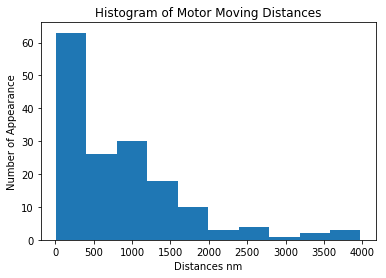

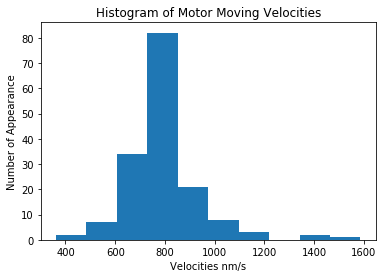

In [43]:
import numpy as np
import matplotlib.pyplot as plt
        
n = 160 # The number of runs to simulate, choose from [10, 20, 40, 80, 160, 1000]
DistanceList = []
VelocityList = []

for i in range(n):
    motor = Motor(ts=10000)
    NumTimeSteps = 0

    while motor.Bound:
        NumTimeSteps += 1
        if motor.decidesToMove(): # Then the motor decides to step.
            
            if motor.detach(): # The motor falls off.
                DistanceList.append(motor.distance)
                VelocityList.append(motor.ts*motor.distance/NumTimeSteps)
                
            else: # The motor does not fall off.
                motor.moveForward()
                
        else: # The motor decides to not step.
            continue

print(np.mean(DistanceList))
print(np.mean(VelocityList))
NumBins = 10 # The number of bins shown in histogram, choose according to n

plt.figure(1)
n, bins, patches = plt.hist(DistanceList, NumBins)
plt.xlabel('Distances nm')
plt.ylabel('Number of Appearance')
plt.title('Histogram of Motor Moving Distances')
plt.show()

plt.figure(2)
n, bins, patches = plt.hist(VelocityList, NumBins)
plt.xlabel('Velocities nm/s')
plt.ylabel('Number of Appearance')
plt.title('Histogram of Motor Moving Velocities')
plt.show()

## RequiredSampleSizeForCI.py

SampleSize = 5
SampleSize = 10
SampleSize = 20
SampleSize = 40
SampleSize = 80
SampleSize = 160
SampleSize = 320


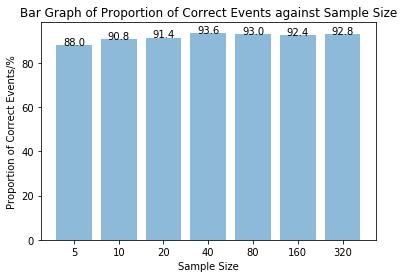

In [38]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

run = 500 # run is the total number of sampling experiments.
ts = 10000 # ts is the number of time steps in a second.
SampleSize = [5, 10, 20, 40, 80, 160, 320]
# Each Element is the number of runs to simulate.
a = 0 # This is used to monitor the running process.
CorrectPercentageList = []

for n in SampleSize:
    print('SampleSize =', SampleSize[a]) # This is used to monitor the running process.
    a += 1
    CorrectEvents = 0
    
    for sample in range(run):
        DistanceList = []
        for i in range(n):
            motor = Motor(ts=10000)
            NumTimeSteps = 0
        
            while motor.Bound:
                NumTimeSteps += 1
                if motor.decidesToMove(): # Then the motor decides to step.
                    
                    if motor.detach(): # The motor falls off.
                        DistanceList.append(motor.distance)
                        
                    else: # The motor does not fall off.
                        motor.moveForward()
                        
                else: # The motor decides to not step.
                    continue
    
        CI = st.t.interval(0.95, len(DistanceList)-1,
                      loc=np.mean(DistanceList), scale=st.sem(DistanceList))
        # Calculate the 95% Confidence Interval

        if CI[0] <= 800 <= CI[1]: # Detect whether expectation is in the CI.
            CorrectEvents += 1

    CorrectPercentage = 100*CorrectEvents/run
    CorrectPercentageList.append(CorrectPercentage)

y_pos = np.arange(len(CorrectPercentageList))
plt.bar(y_pos, CorrectPercentageList, align='center', alpha=0.5)
plt.xticks(y_pos, SampleSize)
plt.xlabel('Sample Size')
plt.ylabel('Proportion of Correct Events/%')
plt.title('Bar Graph of Proportion of Correct Events against Sample Size')
for i, v in enumerate(CorrectPercentageList):
    plt.text(i, v, str(v), horizontalalignment='center')

plt.show()

## VelocityVariation.py

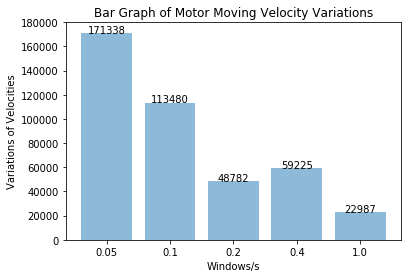

In [45]:
import numpy as np
import matplotlib.pyplot as plt

n = 200 # n is the number of runs to simulate.
Windows = [500, 1000, 2000, 4000, 10000]

VelocityVariation = []
Xticks = []
for window in Windows:

    VelocityList = []
    for i in range(n):
        motor = Motor(ts=10000)
        NumTimeSteps = 0

        while motor.Bound and NumTimeSteps < window:
            # Make sure we only focus the observed window.
            NumTimeSteps += 1
            if motor.decidesToMove(): # Then the motor decides to step.

                if motor.detach(): # The motor falls off.
                    VelocityList.append(motor.ts*motor.distance/NumTimeSteps)
                        
                else: # The motor does not fall off.
                    motor.moveForward()
                        
            else: # The motor decides to not step.
                continue

        VelocityList.append(motor.ts*motor.distance/NumTimeSteps)

    VelocityVariation.append(np.var(VelocityList, ddof=1))
    Xticks.append(window*10**(-4))

y_pos = np.arange(len(VelocityVariation))
plt.bar(y_pos, VelocityVariation, align='center', alpha=0.5)
plt.xticks(y_pos, Xticks)
plt.xlabel('Windows/s')
plt.ylabel('Variations of Velocities')
plt.title('Bar Graph of Motor Moving Velocity Variations')
for i, v in enumerate(VelocityVariation):
    plt.text(i, v, str(int(v)), horizontalalignment='center')
plt.show()

## VelocityObservation.py

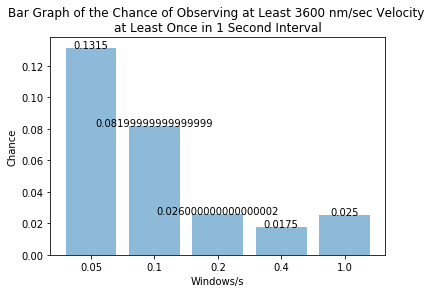

In [61]:
import numpy as np
import matplotlib.pyplot as plt

n = 200 # n is the number of runs to simulate.
Windows = [500, 1000, 2000, 4000, 10000]
wantedVelocity = 1200 # Choose from [900, 1200, 1600, 2400, 3600]

Xticks = []
Chance = []
for window in Windows:
    NumObservation = int(10000/window)
    ChanceList = []

    for i in range(n):
        Frequency = 0

        for a in range(NumObservation):
            motor = Motor(ts=10000, Bound=True)
            NumTimeSteps = 0

            while motor.Bound and NumTimeSteps < window:
                # Make sure we only focus the observed window.
                NumTimeSteps += 1
                if motor.decidesToMove(): # Then the motor decides to step.

                    if motor.detach(): # The motor falls off.
                        Velocity = motor.ts*motor.distance/NumTimeSteps
                        
                    else: # The motor does not fall off.
                        motor.moveForward()
                        
                else: # The motor decides to not step.
                    continue

            Velocity = motor.ts*motor.distance/NumTimeSteps

            if Velocity >= wantedVelocity:
                Frequency += 1

        Frequency = float(Frequency) # Necessary for Python 2
        ChanceList.append(Frequency/NumObservation)

    Chance.append(np.mean(ChanceList))
    Xticks.append(window*10**(-4))

y_pos = np.arange(len(Chance))
plt.bar(y_pos, Chance, align='center', alpha=0.5)
plt.xticks(y_pos, Xticks)
plt.xlabel('Windows/s')
plt.ylabel('Chance')
plt.title('Bar Graph of the Chance of Observing at Least 3600 nm/sec Velocity \n'
          'at Least Once in 1 Second Interval')
for i, v in enumerate(Chance):
    plt.text(i, v, str(v), horizontalalignment='center')
plt.show()

## DoubleMotorSimulation.py

In [99]:
import numpy as np
import matplotlib.pyplot as plt

n = 200 # n is the number of runs to simulate.
DistanceList = []
VelocityList = []
deciderCutOff = 100 # choose from [12.5, 25, 50, 100]

for i in range(n):
    motor1 = Motor(ts=10000, Bound=True)
    motor2 = Motor(ts=10000, Bound=False)
    NumTimeSteps = 0
    Mtr2 = True

    while motor1.Bound or motor2.Bound: # The cargo is still on the MT.
        NumTimeSteps += 1
        if motor1.Bound:
            if motor1.decidesToMove(deciderCutOff=deciderCutOff): # Motor1 decides to step.
                if motor1.detach(): # Motor1 falls off.
                    Mtr2 = True
                        
                else: # Motor1 does not fall off.
                    motor1.moveForward()
                    Mtr2 = False # This avoids the cargo moves 2 steps in 1 time step.     
        else:
            if motor1.rebind():
                pass

        if motor2.Bound:
            if motor2.decidesToMove(deciderCutOff=deciderCutOff): # Motor2 decides to step.
                if motor2.detach(): # Motor2 falls off.
                    pass
                else: # Motor2 does not fall off.
                    if Mtr2: # This avoids the cargo moves 2 steps in 1 time step.
                        motor2.moveForward()        
        else:
            if motor2.rebind():
                pass

    totalDistance = motor1.distance + motor2.distance
    DistanceList.append(totalDistance)
    VelocityList.append(motor1.ts*totalDistance/NumTimeSteps)

print('Mean distance is', np.mean(DistanceList))
print('Mean velocity is', np.mean(VelocityList))

Mean distance is 1787.28
Mean velocity is 785.8636138194382
